### Previsão do preço das casas em Boston.

* Utilizaremos um dataset disponível no próprio scikit_learn: [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html)

* Sabendo de determinados atributos do imóvel, como localização e outras características, busca-se prever o valor do imóvel.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn import datasets

In [16]:
boston = datasets.load_boston()

In [20]:
# Nomes dos atributos:

print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
# Descrição do dataset:

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
# Convertendo o dataset em um dataframe Pandas:

df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
# Aleterando o nome das colunas para o nome dos atributos:

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# Boston.target é um array com o preço das casas:

boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
# Adicionando o preço das casas no DataFrame:

df['PREÇO'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PREÇO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


-----------------------------------------------------------------------------------------------------------------------------

#### Prevendo os preços dos imóveis:

* X: Características da casa (Variáveis independentes/explanatórias)
* Y: Valor do imóvel (Variável dependente)

-----------------------------------------------------------------------------------------------------------------------------

In [26]:
# Importando o módulo de Regressão Linear:

from sklearn.linear_model import LinearRegression

In [27]:
# Definindo X: São os atributos da casa (as colunas), exceto o preço do imóvel:

x = df.drop('PREÇO', axis = 1)

In [28]:
# Definindo Y: Preço do imóvel

y = df.PREÇO

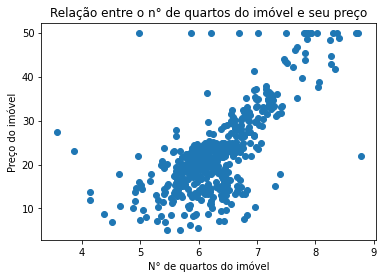

In [29]:
# Verificando a relação entre o número de quartos do imóvel e seu preço:

plt.scatter(df.RM, y)
plt.xlabel('N° de quartos do imóvel')
plt.ylabel('Preço do imóvel')
plt.title('Relação entre o n° de quartos do imóvel e seu preço')
plt.show()

#### Pelo gráfico, é possível verificar que existe uma relação positiva entre o número de quartos do imóvel e seu preço, ou seja, quanto maior for o número de dormitórios, maior também será o valor do imóvel.

In [37]:
# Divisão MANUAL dos dados: Não é a divisão ideal

# Dividindo x em dados de treino e dados de teste:


# x_treino = x[:-50]
# x_teste = x[-50:]

# Dividindo y em dados de treino e dados de teste:

# y_treino = y[:-50]
# y_teste = y[-50:]


In [38]:
# Divisão RANDOMICA dos dados:

from sklearn.model_selection import train_test_split

In [39]:
# Dividindo os dados em x_treino, x_teste e y_treino, y_teste:

x_treino, x_teste, y_treino, y_teste = train_test_split(x, df.PREÇO, test_size = 0.30, random_state = 5)

In [40]:
# Para informação, o shape da divisão:

print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [41]:
# Criando o objeto de Regressão Linear:

modelo = LinearRegression()

In [42]:
# Treinando o modelo:

modelo.fit(x_treino, y_treino)

LinearRegression()

In [43]:
# A título de informação, os coeficientes da equação linear:

print('Coeficientes: ', modelo.intercept_)
print('Quantidade de coeficiente: ', len(modelo.coef_))

Coeficientes:  31.730351296497663
Quantidade de coeficiente:  13


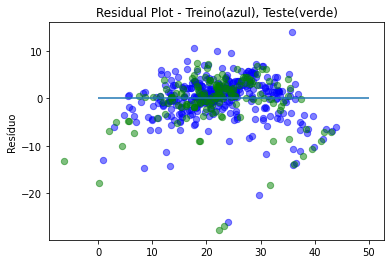

In [44]:
# Comparando os preços originais com os preços previstos:

plt.scatter(modelo.predict(x_treino), modelo.predict(x_treino)-y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(modelo.predict(x_teste), modelo.predict(x_teste)-y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y =0, xmin = 0, xmax = 50)
plt.ylabel('Resíduo')
plt.title('Residual Plot - Treino(azul), Teste(verde)')
plt.show()